In [280]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [281]:
small_img = cv2.imread('data/watermark_no_copy.png')

In [282]:
bg = cv2.imread('data/bg_2.jpg')

In [283]:
img = cv2.cvtColor(small_img, cv2.COLOR_BGR2RGB)
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

In [284]:
img = cv2.resize(img, (1000,1000))

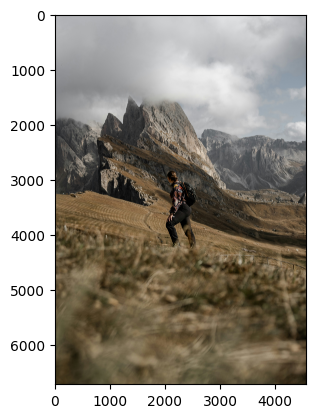

In [285]:
plt.imshow(bg)

In [286]:
bg.shape

(6715, 4554, 3)

In [287]:
x_offset = 4554 - 1000 - 3000
y_offset = 6715 - 1000 - 3000

In [288]:
x_offset

554

In [289]:
y_offset

2715

In [290]:
roi = bg[y_offset:6715-3000, x_offset:4554-3000]

In [291]:
roi.shape

(1000, 1000, 3)

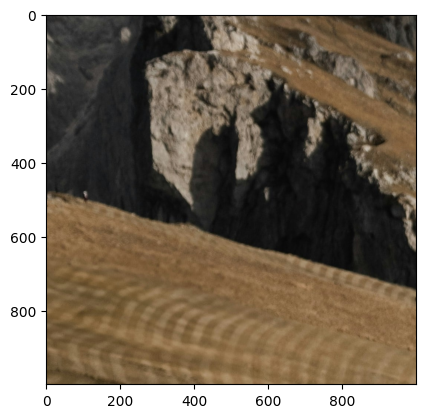

In [292]:
plt.imshow(roi)

In [293]:
img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

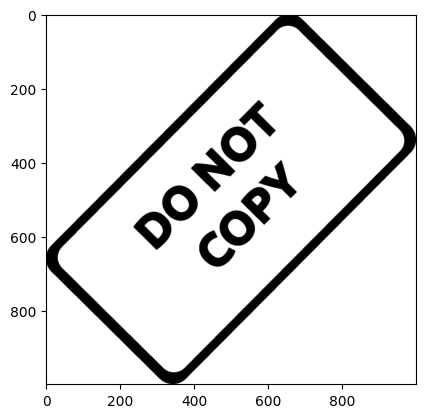

In [294]:
plt.imshow(img2gray, cmap='gray')

In [295]:
mask_inv = cv2.bitwise_not(img2gray)

In [296]:
white_background = np.full(img.shape,255,dtype=np.uint8)

In [297]:
white_background.shape

(1000, 1000, 3)

In [298]:
bk = cv2.bitwise_or(white_background,white_background,mask=mask_inv)

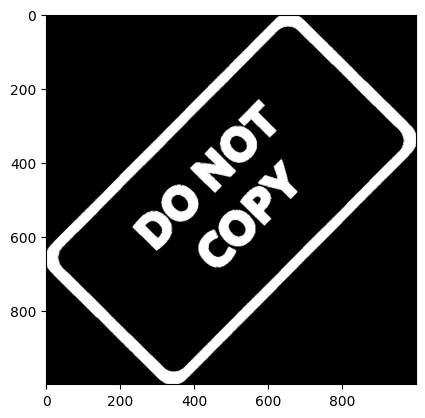

In [299]:
plt.imshow(bk)

In [300]:
fg = cv2.bitwise_or(img, img, mask=mask_inv)

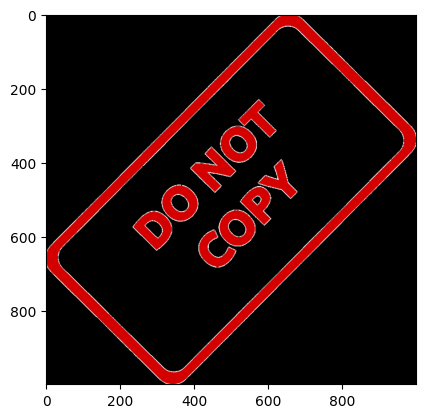

In [301]:
plt.imshow(fg)

In [302]:
print(roi.shape, fg.shape)


(1000, 1000, 3) (1000, 1000, 3)


In [303]:
final_roi = cv2.bitwise_or(roi, fg)

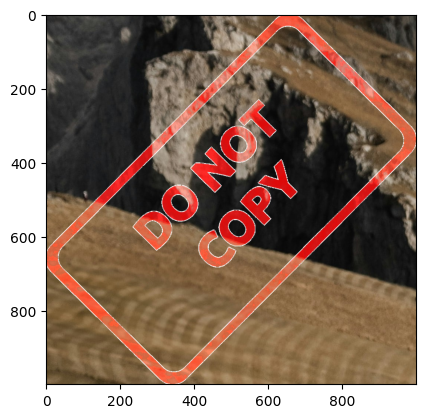

In [304]:
plt.imshow(final_roi)

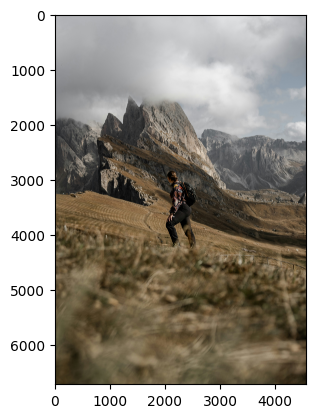

In [305]:
plt.imshow(bg)

In [306]:
small_img.shape[0]

1280

In [307]:
large_img = bg 
small_img = final_roi

In [308]:
y_offset

2715

In [309]:
small_img.shape[0]

1000

In [310]:
small_img.shape[1]

1000

In [311]:
large_img[y_offset:y_offset + small_img.shape[0], x_offset:x_offset + small_img.shape[1]] = small_img

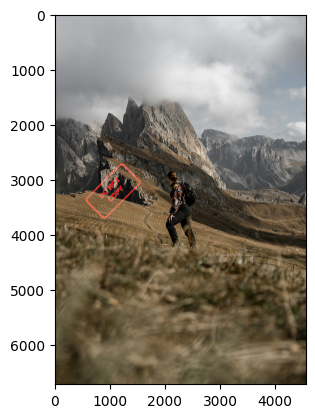

In [312]:
plt.imshow(large_img)

In [313]:

cv2.imwrite('fig4.jpg', large_img)

True

In [314]:
img = cv2.imread("fig4.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imwrite('fig4.jpg', img)

True